# Лаба 3_2

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('Titanic.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Удалим столбцы содержащие не числовые значения, за исключением столбцов Sex и Embarked

In [9]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


#### Удаляем пропуски

In [12]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [14]:
df.loc[:,'Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.loc[:,'Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [15]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,3
886,887,0,2,1,27.0,0,0,13.0000,1
887,888,1,1,0,19.0,0,0,30.0000,1
889,890,1,1,1,26.0,0,0,30.0000,2


In [16]:
df = df.drop('PassengerId', axis=1)

In [17]:
df.shape

(712, 8)

In [18]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)                                     
predict = model.predict(X_test)

In [21]:
accuracy_score(y_test, predict)

0.7702127659574468

#### Без признака Embarked

In [23]:
y_train

625    0
465    0
398    0
608    1
103    0
      ..
93     0
135    0
338    1
549    1
131    0
Name: Survived, Length: 477, dtype: int64

In [24]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train.drop('Embarked', axis=1), y_train)                                     
predict = model.predict(X_test.drop('Embarked', axis=1))

In [25]:
accuracy_score(y_test, predict)

0.774468085106383

# Лаба 3_3

# Часть 1

In [54]:
from sklearn.metrics import classification_report

In [58]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       136
           1       0.75      0.70      0.72        99

    accuracy                           0.77       235
   macro avg       0.77      0.76      0.77       235
weighted avg       0.77      0.77      0.77       235



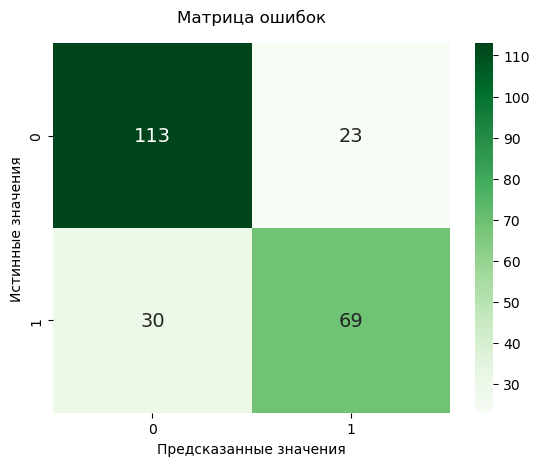

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.title('Матрица ошибок', pad=15)
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

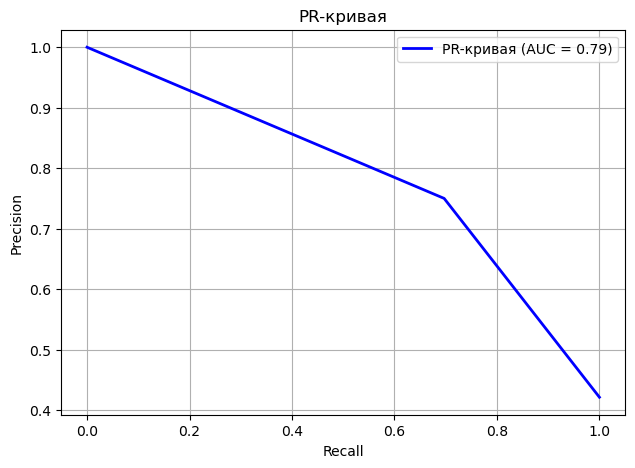

In [157]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
precision, recall, thresholds_pr = precision_recall_curve(y_test, predict)
pr_auc = auc(recall, precision)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-кривая (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.legend()
plt.grid()

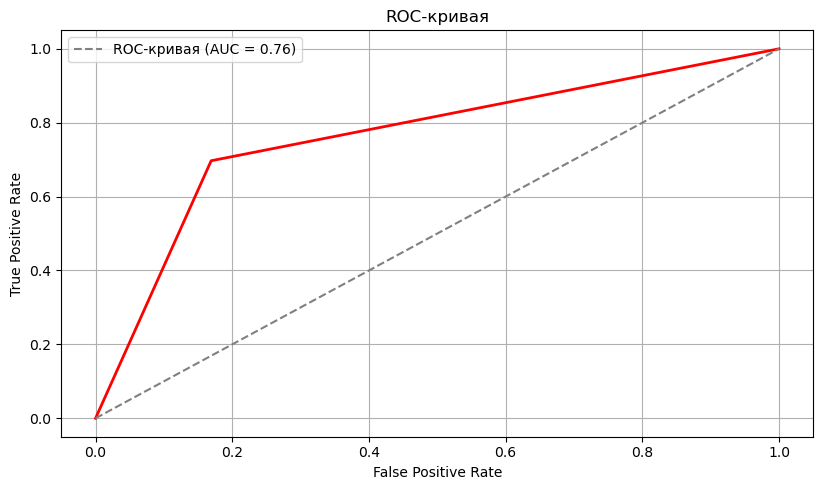

In [153]:
fpr, tpr, thresholds_roc = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Часть 2

In [115]:
from sklearn.svm import SVC


In [119]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

In [165]:
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       136
           1       0.68      0.39      0.50        99

    accuracy                           0.67       235
   macro avg       0.67      0.63      0.63       235
weighted avg       0.67      0.67      0.65       235



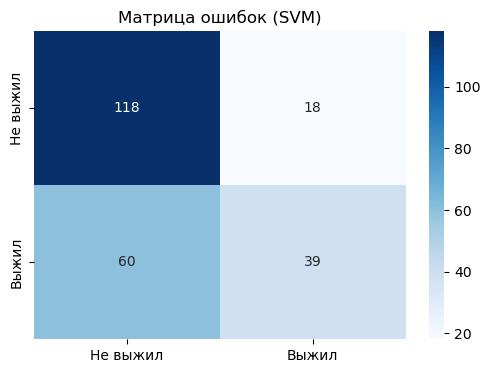

In [133]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не выжил', 'Выжил'], 
            yticklabels=['Не выжил', 'Выжил'])
plt.title(f'Матрица ошибок (SVM)')
plt.show()

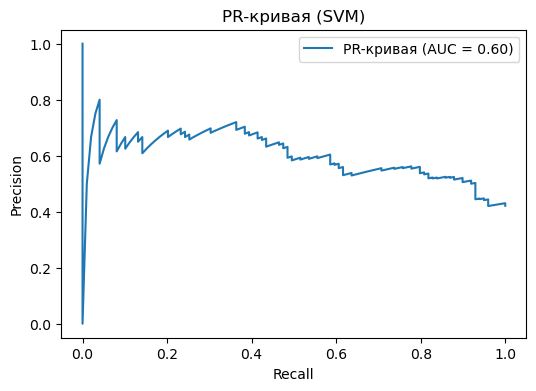

In [135]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR-кривая (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR-кривая (SVM)')SVM
plt.legend()
plt.show()

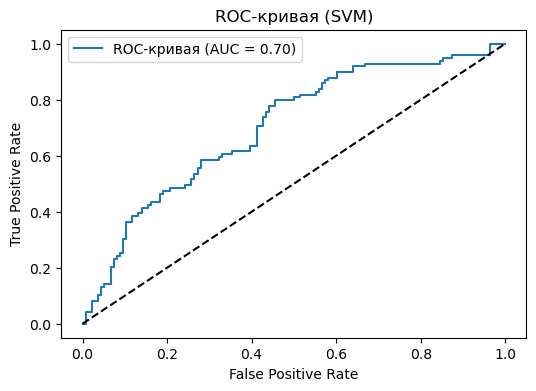

In [137]:
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая (SVM)')
plt.legend()
plt.show()

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

In [167]:
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       136
           1       0.54      0.62      0.58        99

    accuracy                           0.62       235
   macro avg       0.61      0.62      0.61       235
weighted avg       0.63      0.62      0.62       235



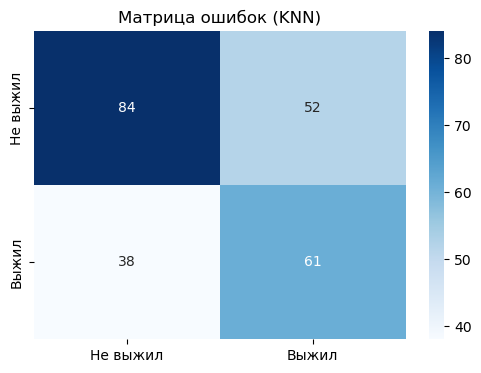

In [147]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не выжил', 'Выжил'], 
            yticklabels=['Не выжил', 'Выжил'])
plt.title(f'Матрица ошибок (KNN)')
plt.show()

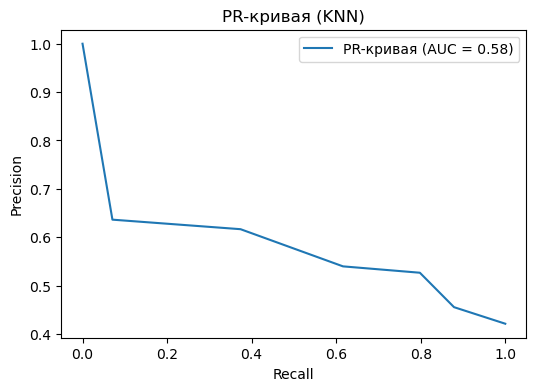

In [149]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_knn)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR-кривая (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR-кривая (KNN)')
plt.legend()
plt.show()

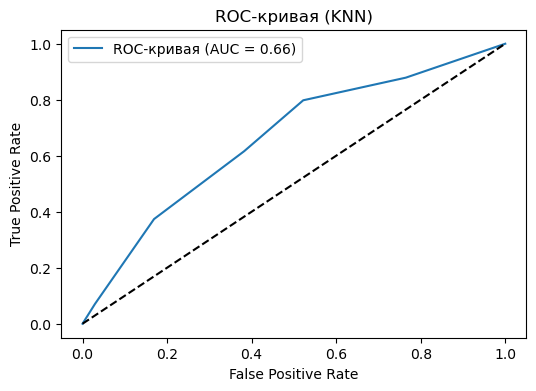

In [151]:
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая (KNN)')
plt.legend()
plt.show()

In [197]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

metrics = {
    'Model': ['SVM', 'KNN'],
    'Precision': [precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_knn)],
    'Recall': [recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_knn)],
    'F1-score': [f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_knn)],
    'ROC AUC': [roc_auc_score(y_test, y_proba_svm), roc_auc_score(y_test, y_proba_knn)],
    'PR AUC': [average_precision_score(y_test, y_proba_svm), average_precision_score(y_test, y_proba_knn)]
}

pd.DataFrame(metrics).set_index('Model')

,Precision,Recall,F1-score,ROC AUC,PR AUC
Model,,,,,
SVM,0.684211,0.393939,0.500000,0.702466,0.604065
KNN,0.539823,0.616162,0.575472,0.660873,0.546360


#### SVM показала лучшие результаты